In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



In [3]:
num_robot = 24
fieldsPerKilobot = 7
experiment_time = 1800

In [4]:
bin_edges = np.arange(1,22,2)

In [5]:
results_folders = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_realEXP/'

In [6]:
if not os.path.isdir(results_folders):
    print(colored("Error, " + results_folders + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folders + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_realEXP/ exists


### kiloLOG labels

In [7]:
kiloLOG_label = ['time']
for i in range(0, num_robot*fieldsPerKilobot, fieldsPerKilobot):
    kiloLOG_label += ['id' + str(i // fieldsPerKilobot), 'col' + str(i // fieldsPerKilobot), 'posx' + str(i // fieldsPerKilobot), 'posy' + str(i // fieldsPerKilobot), 'ori' + str(i // fieldsPerKilobot), 'state' + str(i // fieldsPerKilobot), 'timer' + str(i // fieldsPerKilobot)]

In [8]:
def get_histogram(distribution_history, bins):
    hist_val = np.array([])
    for x in distribution_history.T:
    #     print(x.size)
        hist,_= np.histogram(x,bins) 
#         print(x)
#         print(hist/np.count_nonzero(~np.isnan(x)), end='\n\n')
        hist_val = np.vstack([hist_val, hist/np.count_nonzero(~np.isnan(x))]) if hist_val.size else hist/np.count_nonzero(~np.isnan(x))

    print(hist_val.shape)
    return hist_val

def plot_heatmap(histogram,bins,imgName, regionSide):
    fig = plt.figure(figsize=(20, 5), dpi=160)

    y_values = histogram.T
    y_edges = bins.round(decimals=2)

    # plt.xlabel('time(s)')
    yticks = y_edges


    # print("\t v_max:", v_max)
    ax = sns.heatmap(y_values, yticklabels=yticks, cmap="viridis", vmin=0, vmax=1)
    ax.set_title("Timeout distribution in "+regionSide+" region")
    ax.set_xlabel('time(s)')
    plt.ylabel('timeout')
    plt.yticks(np.arange(y_edges.size), yticks)
    fileName = "REAL_adaptiveTimeout_timeoutDistribution_"+regionSide+"_"+imgName+".png"
    print(fileName)
    
    plt.savefig(fileName)
    plt.show()

Timeout folder: Mixed_Adaptive
	Exp configuration: Mixed_Adaptive
	filename:  7_log_dhtf_kilopos.txt
	filename:  9_log_dhtf_kilopos.txt
	filename:  6_log_dhtf_kilopos.txt
	filename:  10_log_dhtf_kilopos.txt
	filename:  4_log_dhtf_kilopos.txt
	filename:  5_log_dhtf_kilopos.txt
	filename:  12_log_dhtf_kilopos.txt
	filename:  3_log_dhtf_kilopos.txt
	filename:  2_log_dhtf_kilopos.txt
	filename:  1_log_dhtf_kilopos.txt
	filename:  8_log_dhtf_kilopos.txt
	filename:  11_log_dhtf_kilopos.txt
(1000, 10)
REAL_adaptiveTimeout_timeoutDistribution_red_Mixed_Adaptive.png


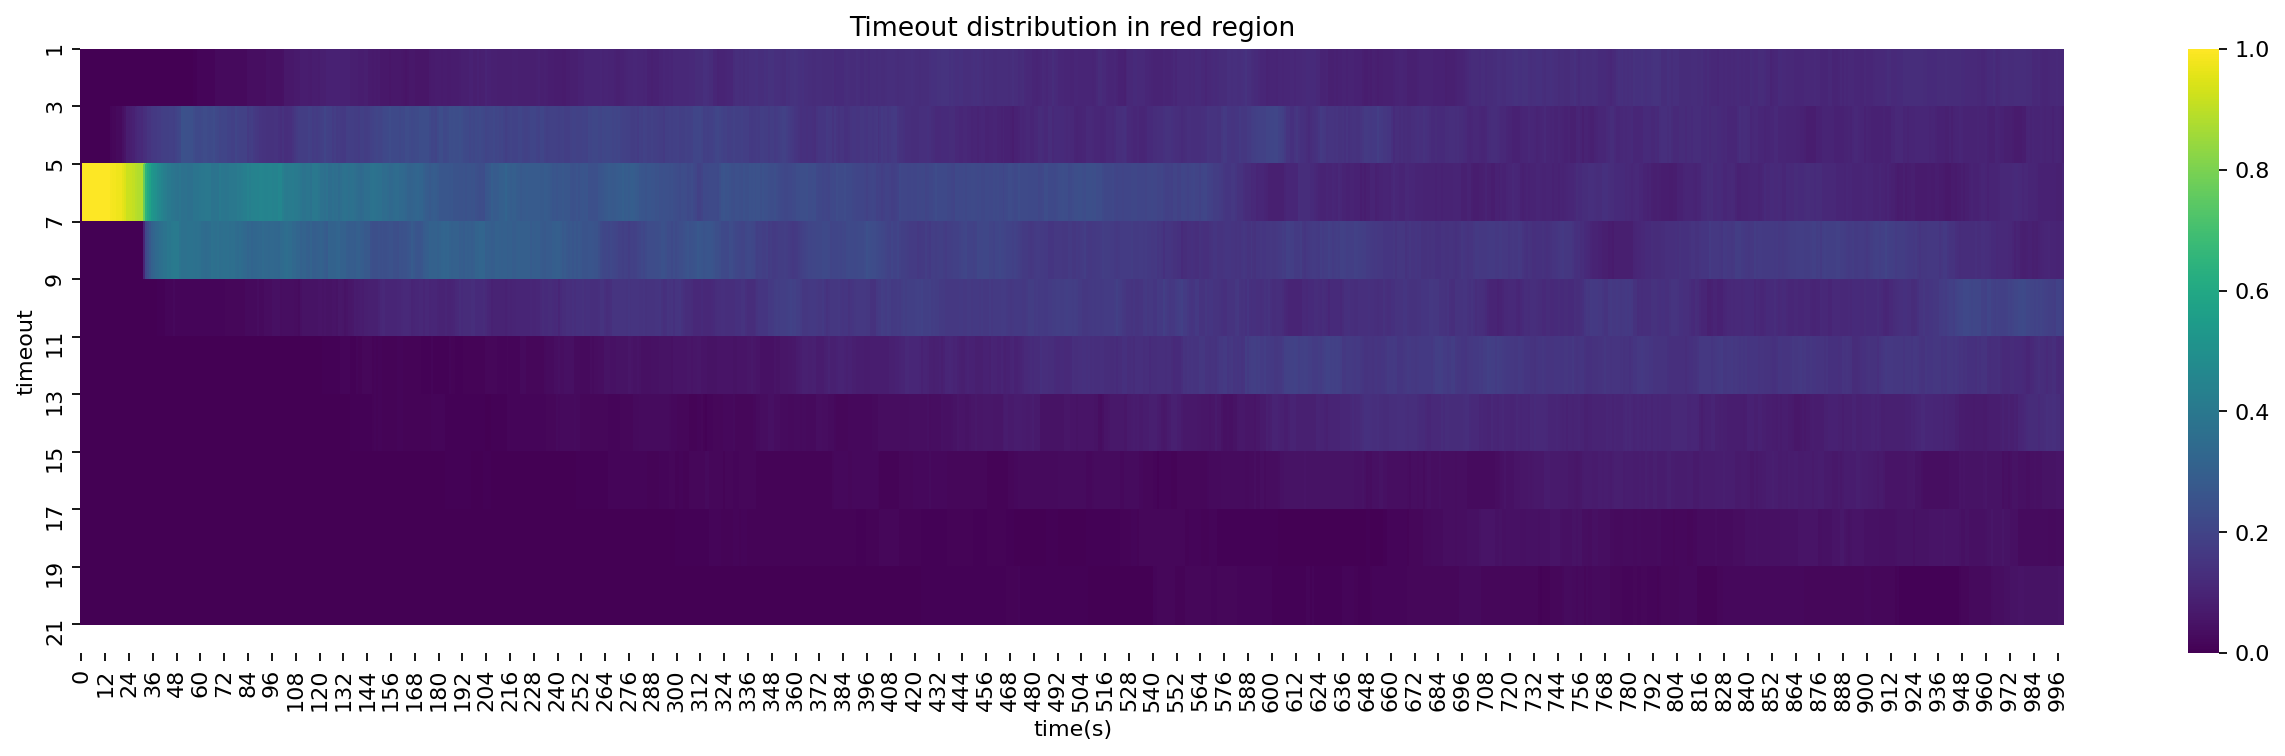

(1000, 10)
REAL_adaptiveTimeout_timeoutDistribution_blue_Mixed_Adaptive.png


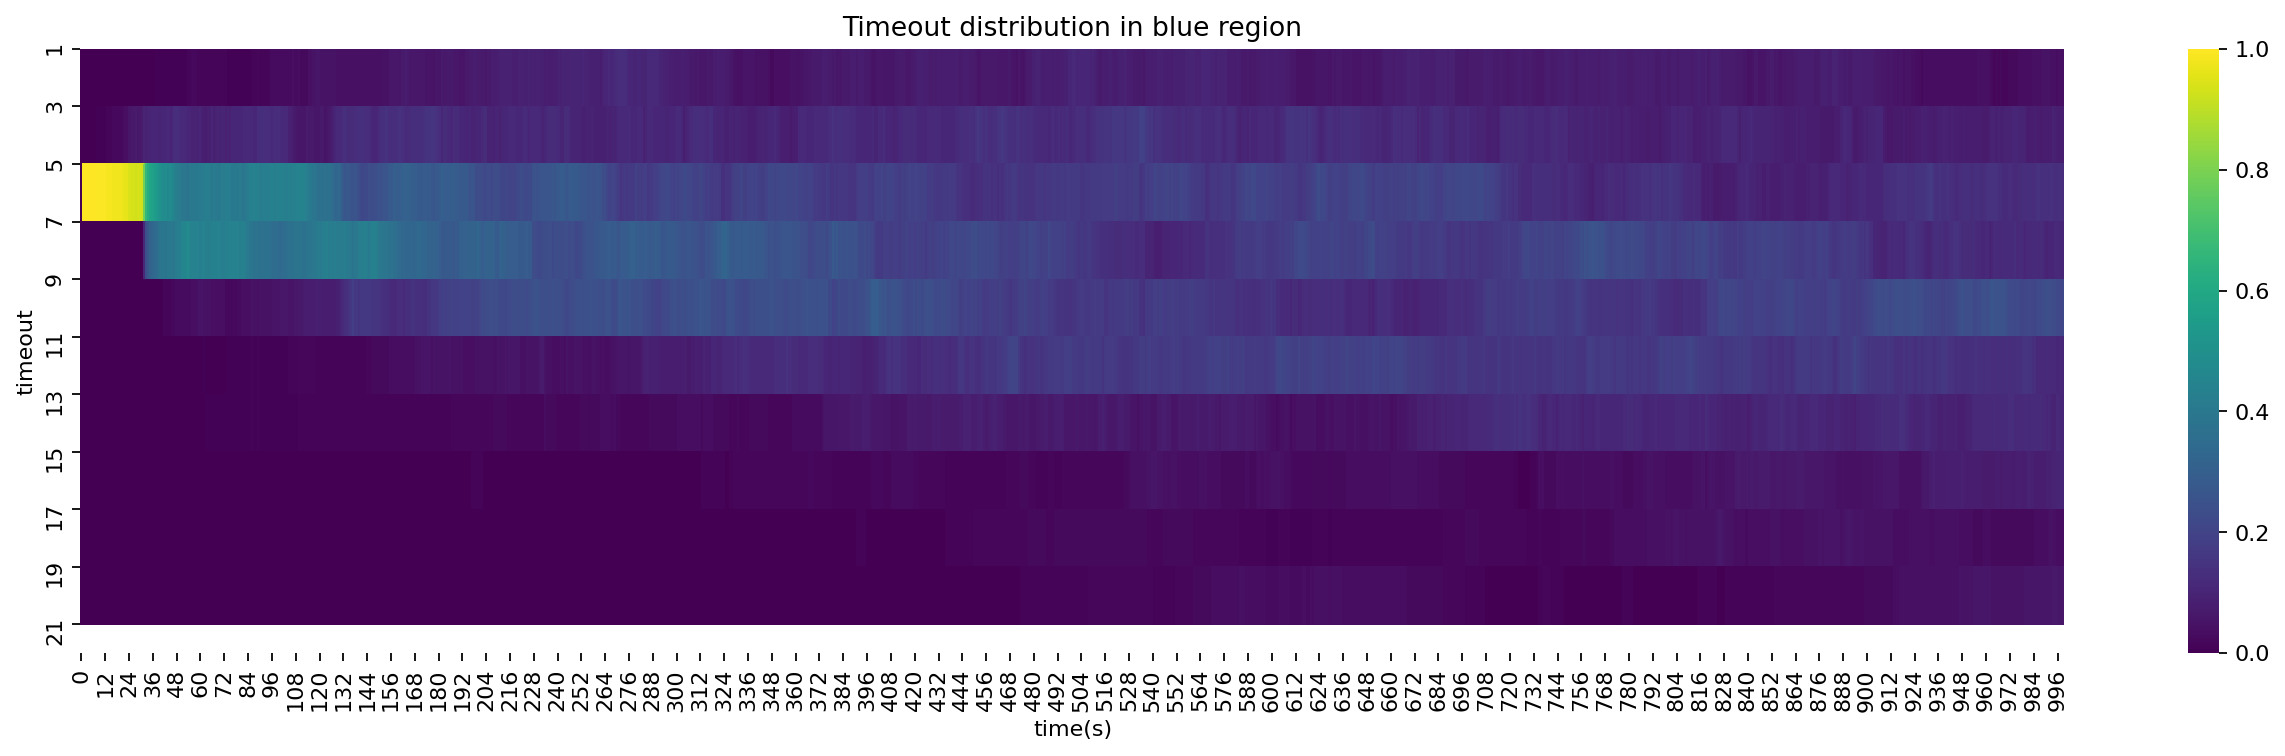

Timeout folder: Regions_Adaptive
	Exp configuration: Regions_Adaptive
	filename:  7_log_dhtf_kilopos.txt
	filename:  9_log_dhtf_kilopos.txt
	filename:  6_log_dhtf_kilopos.txt
	filename:  10_log_dhtf_kilopos.txt
	filename:  16_log_dhtf_kilopos.txt
	filename:  12_log_dhtf_kilopos.txt
	filename:  14_log_dhtf_kilopos.txt
	filename:  13_log_dhtf_kilopos.txt
	filename:  17_log_dhtf_kilopos.txt
	filename:  15_log_dhtf_kilopos.txt
	filename:  8_log_dhtf_kilopos.txt
	filename:  11_log_dhtf_kilopos.txt
(1000, 10)
REAL_adaptiveTimeout_timeoutDistribution_red_Regions_Adaptive.png


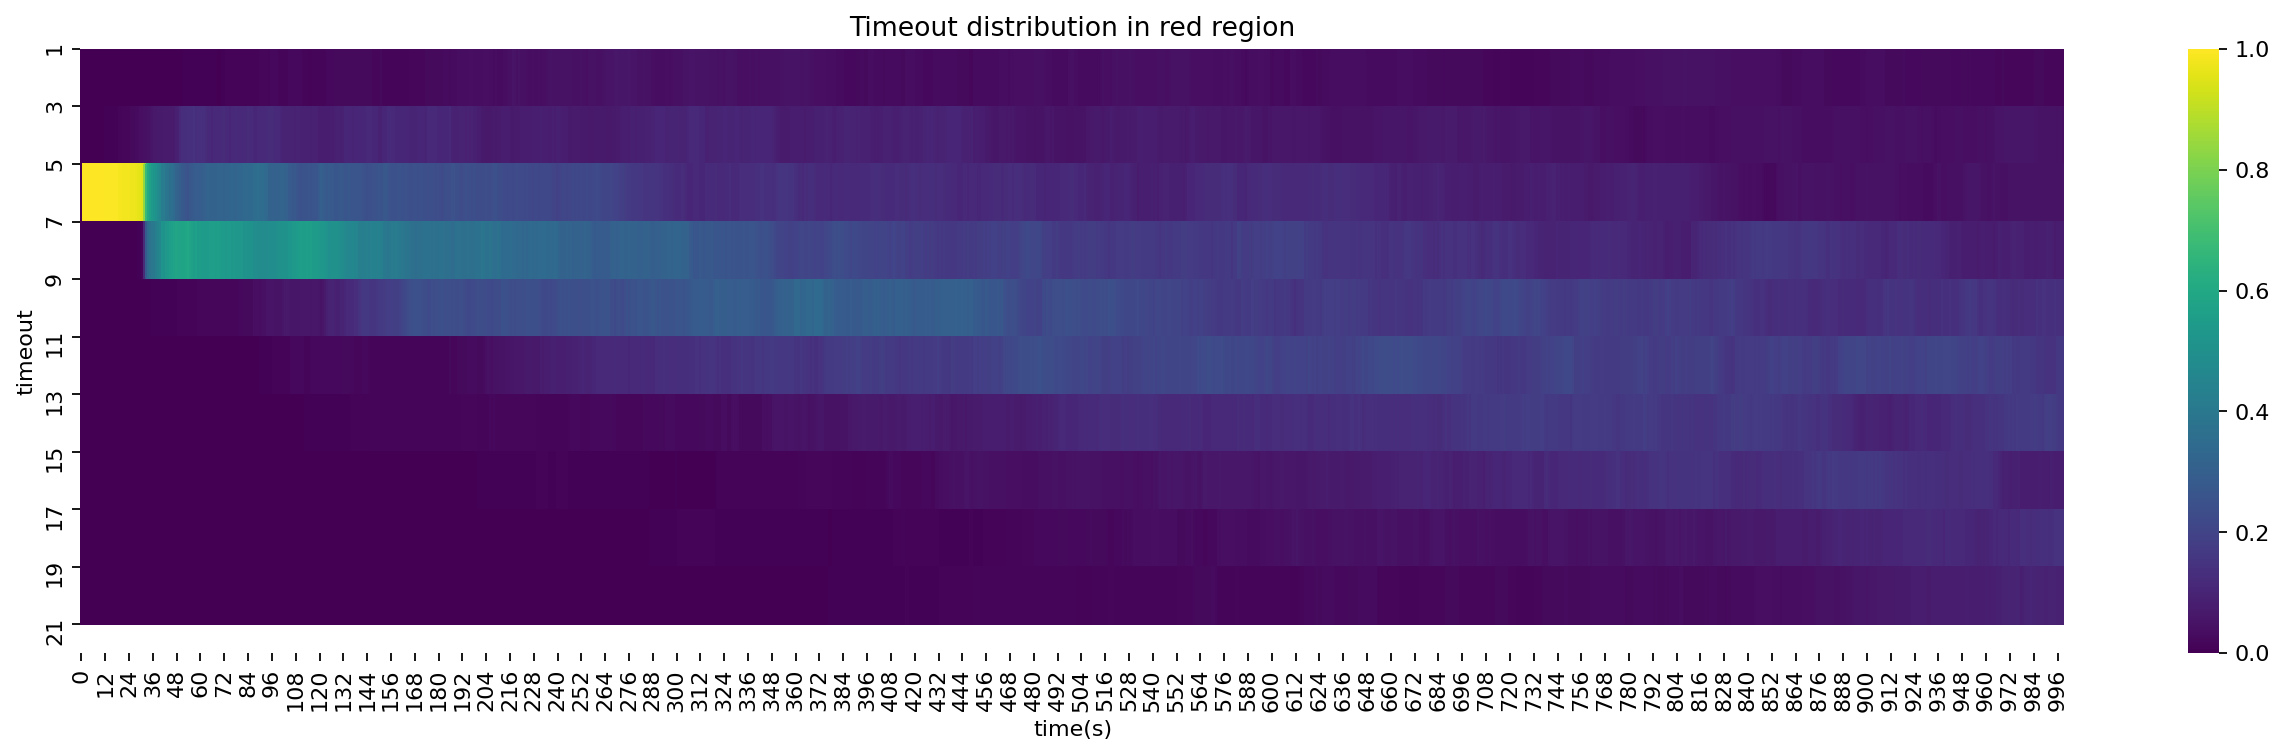

(1000, 10)
REAL_adaptiveTimeout_timeoutDistribution_blue_Regions_Adaptive.png


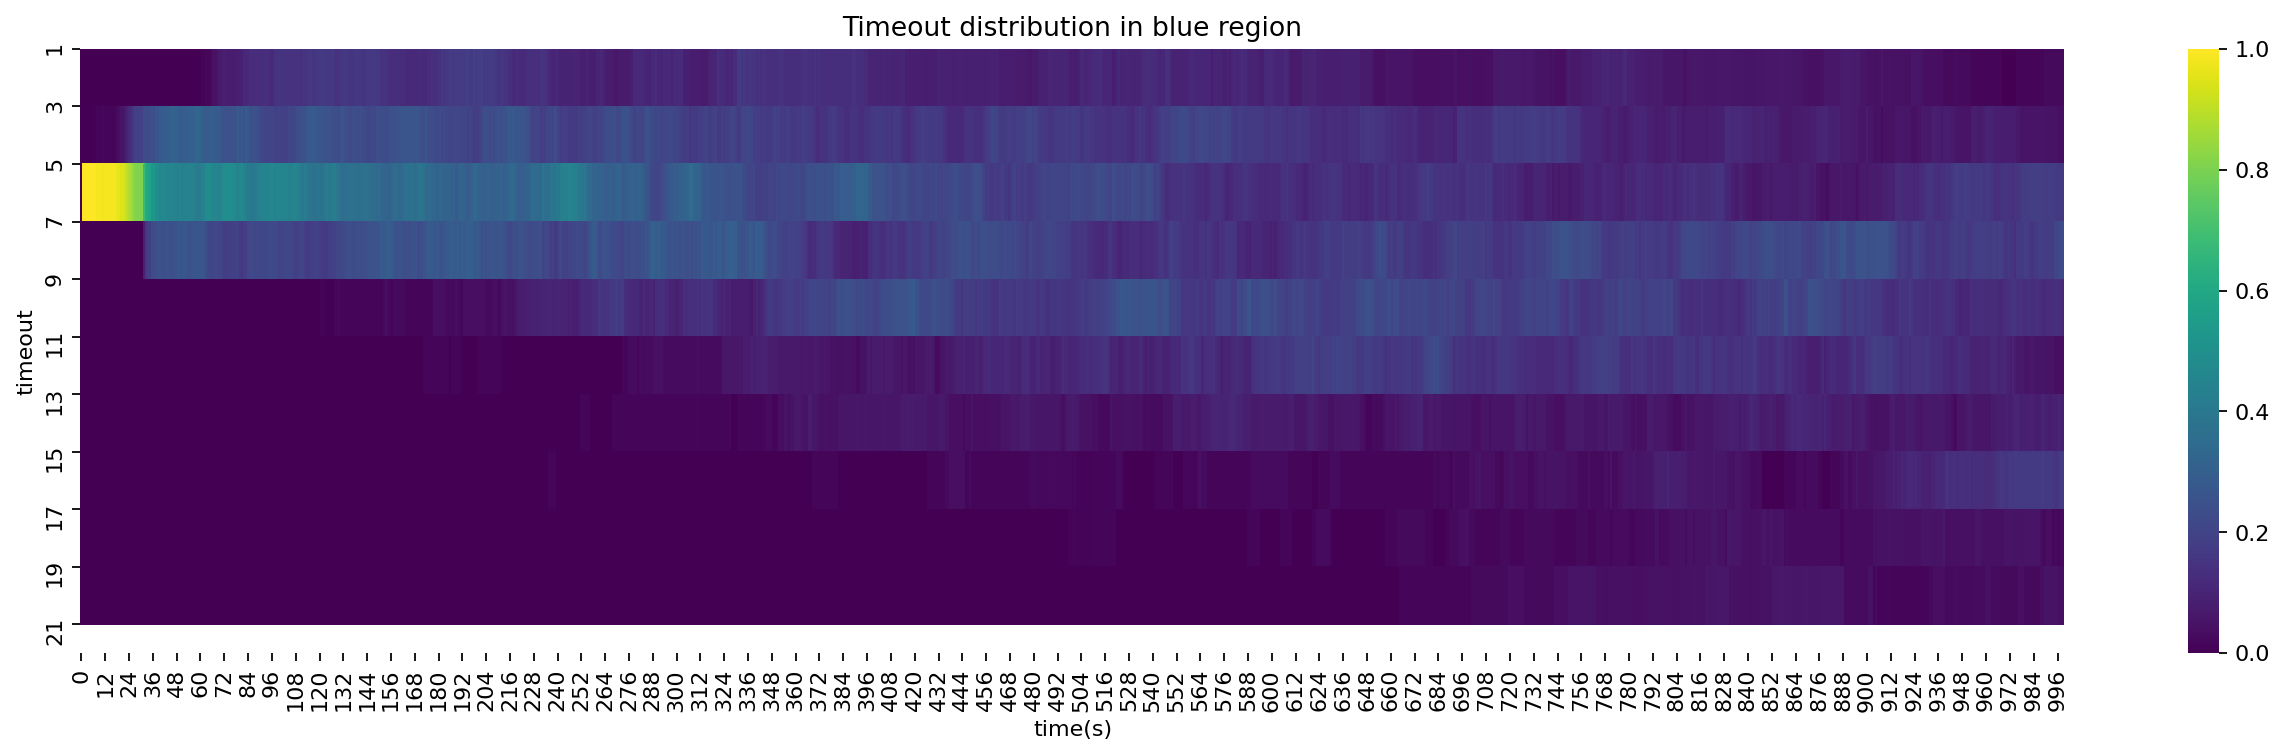

In [9]:
for results_folder in os.listdir(results_folders):
    timeout = -1
    for timeout_folder in natsorted(os.listdir(os.path.join(results_folders,results_folder))):
        print(colored("Timeout folder:", 'blue'),timeout_folder)

        parameters = timeout_folder.split("_")


        exp_config = parameters[0]+"_"+parameters[1]
        print("\tExp configuration:",exp_config)
        
        
        timeout_red = np.array([]).astype(int)
        timeout_blue = np.array([]).astype(int)
        for filename in os.listdir(os.path.join(results_folders, results_folder, timeout_folder)):
            if filename.endswith("kilopos.txt"):
                if not os.path.getsize(os.path.join(results_folders, results_folder, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + filename, 'red'))
                    continue
                print('\tfilename: ', filename)

                df_kiloLOG = pd.read_csv(os.path.join(results_folders, results_folder, timeout_folder, filename), sep="\t", header=None)
                df_kiloLOG.columns = kiloLOG_label
        
                for k in range(1, num_robot*fieldsPerKilobot, fieldsPerKilobot):
#                     print(df_kiloLOG.iloc[:5,k:k+fieldsPerKilobot])

                    df_k = df_kiloLOG.iloc[:,k:k+fieldsPerKilobot]
                    
                    df_kiloRED = df_k.where(df_k["posx"+str(k//fieldsPerKilobot)] < 1000) 
                    
                    timeout_red = np.vstack([timeout_red,df_kiloRED["timer"+str(k//fieldsPerKilobot)].values]) if timeout_red.size else df_kiloRED["timer"+str(k//fieldsPerKilobot)].values
                    
                    df_kiloBLUE = df_k.where(df_k["posx"+str(k//fieldsPerKilobot)] > 1000) 
                    timeout_blue = np.vstack([timeout_blue,df_kiloBLUE["timer"+str(k//fieldsPerKilobot)].values]) if timeout_blue.size else df_kiloBLUE["timer"+str(k//fieldsPerKilobot)].values
#                     print(timeout_blue)
#                     print(df_kiloBLUE["timer"+str(k//fieldsPerKilobot)].iloc[:5])
        
        histogram_red = get_histogram(timeout_red, bin_edges)
        plot_heatmap(histogram_red, bin_edges,exp_config, "red")
        
        histogram_blue = get_histogram(timeout_blue, bin_edges)
        plot_heatmap(histogram_blue, bin_edges,exp_config, "blue")


In [10]:
# histogram_red